In [14]:
# DES Image Encryption, Decryption, and Practical Attack Implementation (Google Colab Compatible)

# **1. Install Required Libraries**
!pip install pillow pycryptodome numpy matplotlib

In [15]:
# **2. Import Dependencies**
import numpy as np
from Crypto.Cipher import DES
from PIL import Image
import matplotlib.pyplot as plt
import itertools
import os

In [16]:
# **3. Load and Process Images**
def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img, dtype=np.uint8)
    return img, img_array

def show_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
from google.colab import files
uploaded = files.upload()

def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img, dtype=np.uint8)
    return img_array

In [6]:
# **4. Convert Image Data to Binary**
def pad_data(data):
    while len(data) % 8 != 0:
        data += b"\x00"
    return data


In [17]:
# **5. Generate DES Key**
def generate_key():
    return os.urandom(8)  # Generate a random 8-byte key

In [18]:
# **6. DES Encryption Function**
def encrypt_image(image_array, key, mode=DES.MODE_ECB):
    cipher = DES.new(key, mode)
    data = pad_data(image_array.tobytes())
    encrypted_data = cipher.encrypt(data)
    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8).reshape(image_array.shape)
    return encrypted_array

In [19]:
# **7. DES Encryption Function**
def encrypt_image(image_array, key, mode=DES.MODE_ECB, iv=None, nonce=None):
    if mode == DES.MODE_CTR:
        cipher = DES.new(key, mode, nonce=b"\x00\x00\x00\x00")  # Fixed 4-byte nonce for DES
    elif mode in [DES.MODE_CBC, DES.MODE_CFB, DES.MODE_OFB]:
        cipher = DES.new(key, mode, iv=iv)
    else:
        cipher = DES.new(key, mode)

    data = pad_data(image_array.tobytes())
    encrypted_data = cipher.encrypt(data)
    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8).reshape(image_array.shape)
    return encrypted_array

Try Some Additional Code

In [21]:
# **8. Test DES Encryption and Decryption   With Lena **
image_path = "/content/Baboon.png"  # Change to your image file
img, img_array = load_image(image_path)
key = generate_key()

encrypted_img_array = encrypt_image(img_array, key)
decrypted_img_array = decrypt_image(encrypted_img_array, key)

show_image(img, "Original Image")
show_image(encrypted_img_array, "Encrypted Image")
show_image(decrypted_img_array, "Decrypted Image")


NameError: name 'decrypt_image' is not defined

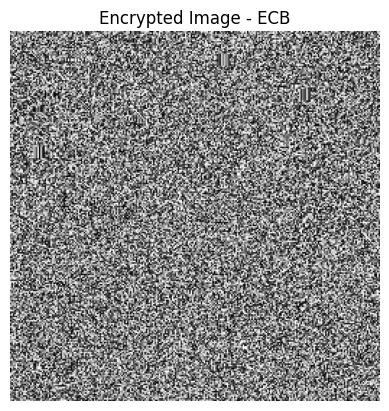

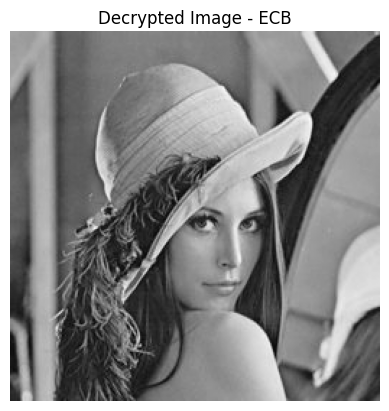

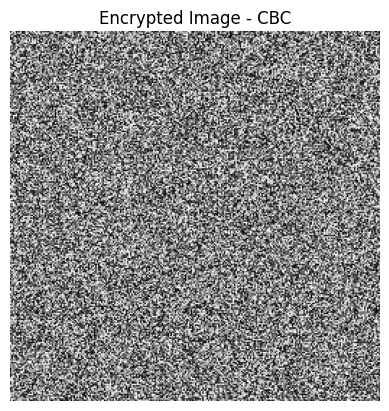

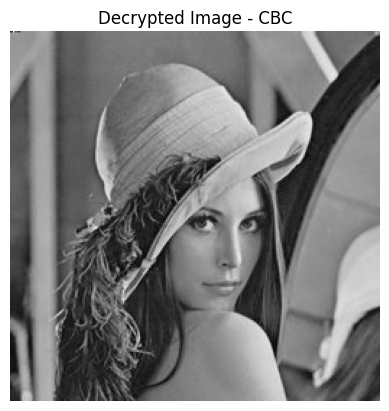

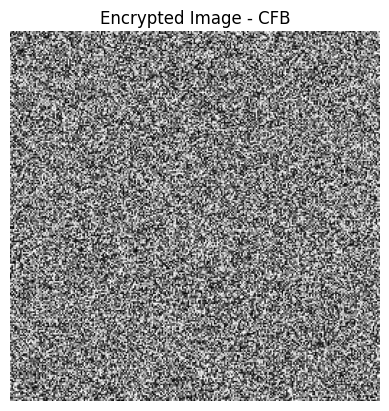

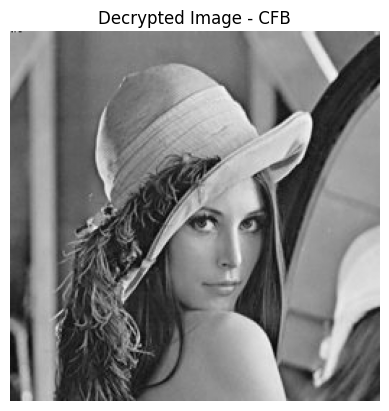

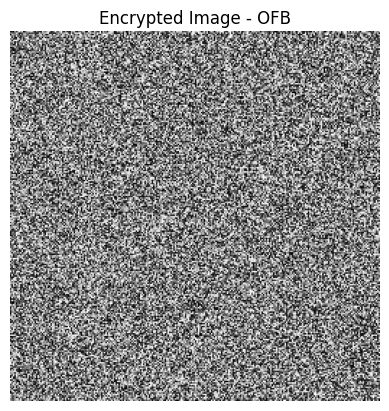

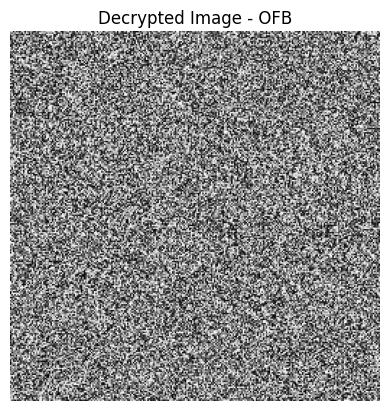

In [111]:
# **9. Implementing Different Modes (CBC, CFB, OFB, CTR)**
IV = os.urandom(8)  # Initialization Vector

modes = {
    "ECB": DES.MODE_ECB,
    "CBC": DES.MODE_CBC,
    "CFB": DES.MODE_CFB,
    "OFB": DES.MODE_OFB,
    #"CTR": DES.MODE_CTR,

}

for mode_name, mode_value in modes.items():
    encrypted_img_array = encrypt_image(img_array, key, mode_value)
    decrypted_img_array = decrypt_image(encrypted_img_array, key, mode_value)
    show_image(encrypted_img_array, f"Encrypted Image - {mode_name}")
    show_image(decrypted_img_array, f"Decrypted Image - {mode_name}")


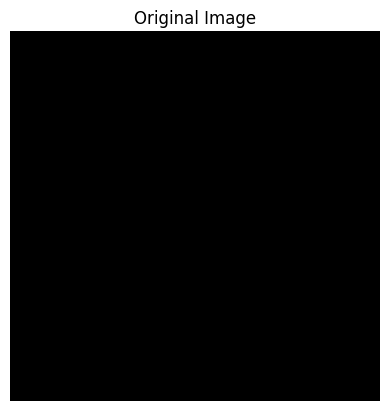

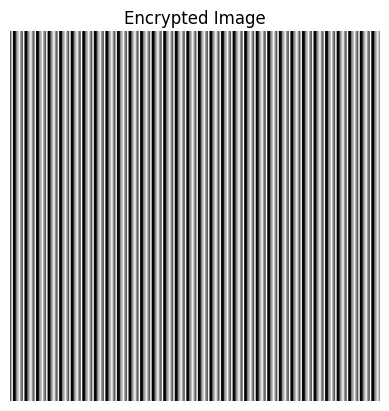

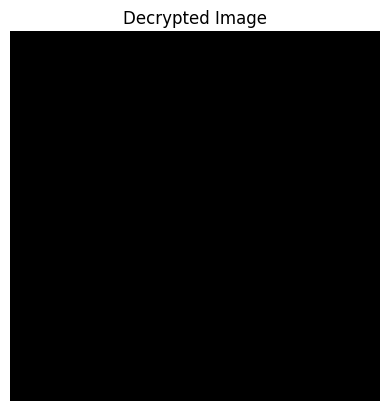

In [112]:
# **8. Test DES Encryption and Decryption**
image_path = "/content/Black_square.png"  # Change to your image file
img, img_array = load_image(image_path)
key = generate_key()

encrypted_img_array = encrypt_image(img_array, key)
decrypted_img_array = decrypt_image(encrypted_img_array, key)

show_image(img, "Original Image")
show_image(encrypted_img_array, "Encrypted Image")
show_image(decrypted_img_array, "Decrypted Image")

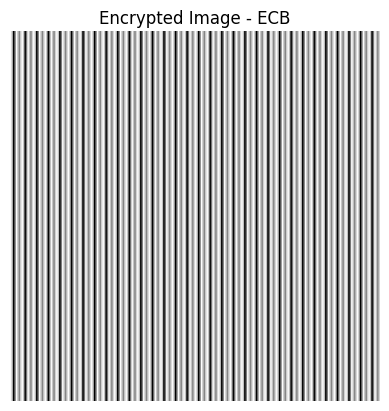

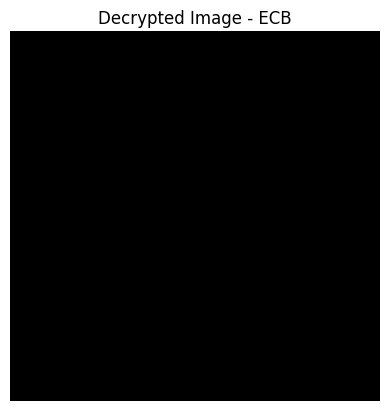

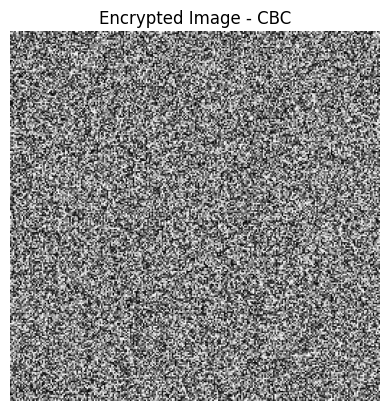

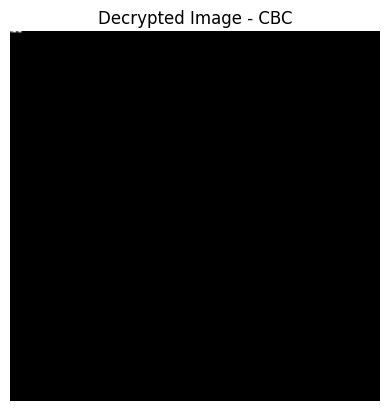

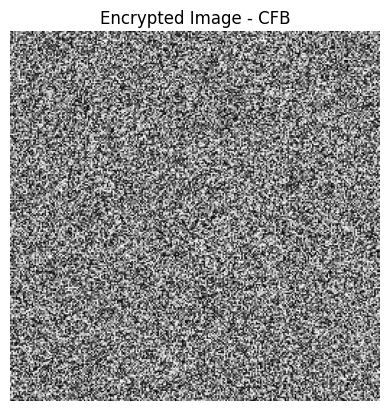

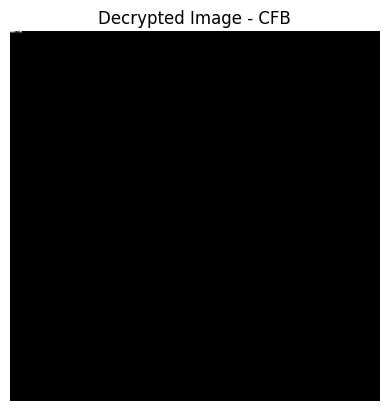

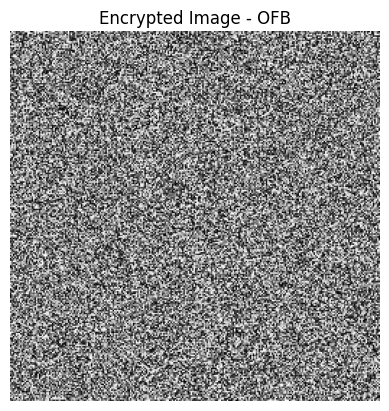

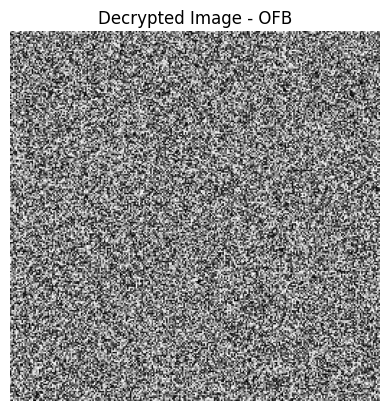

In [59]:
# **9. Implementing Different Modes (CBC, CFB, OFB, CTR)**
IV = os.urandom(8)  # Initialization Vector

modes = {
    "ECB": DES.MODE_ECB,
    "CBC": DES.MODE_CBC,
    "CFB": DES.MODE_CFB,
    "OFB": DES.MODE_OFB,

}

for mode_name, mode_value in modes.items():
    encrypted_img_array = encrypt_image(img_array, key, mode_value)
    decrypted_img_array = decrypt_image(encrypted_img_array, key, mode_value)
    show_image(encrypted_img_array, f"Encrypted Image - {mode_name}")
    show_image(decrypted_img_array, f"Decrypted Image - {mode_name}")

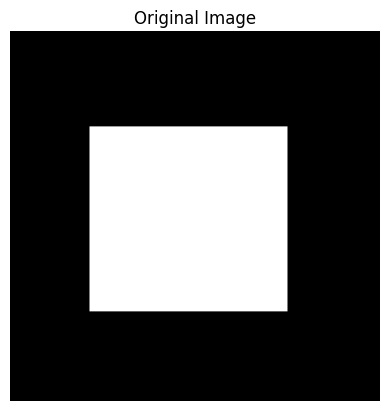

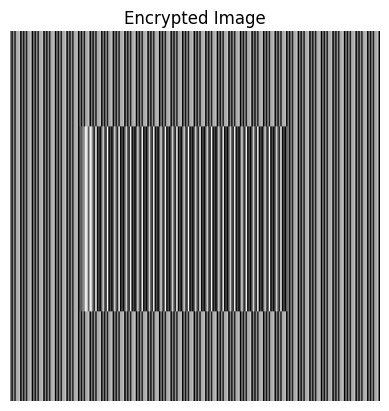

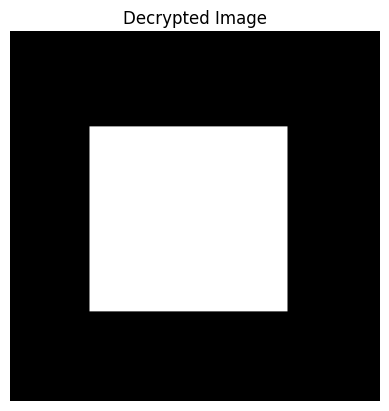

In [60]:
# **8. Test DES Encryption and Decryption**
image_path = "/content/Black_with_WS.png"  # Change to your image file
img, img_array = load_image(image_path)
key = generate_key()

encrypted_img_array = encrypt_image(img_array, key)
decrypted_img_array = decrypt_image(encrypted_img_array, key)

show_image(img, "Original Image")
show_image(encrypted_img_array, "Encrypted Image")
show_image(decrypted_img_array, "Decrypted Image")

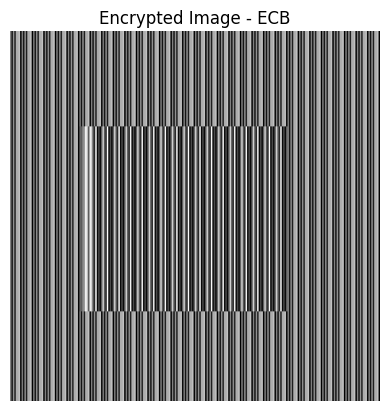

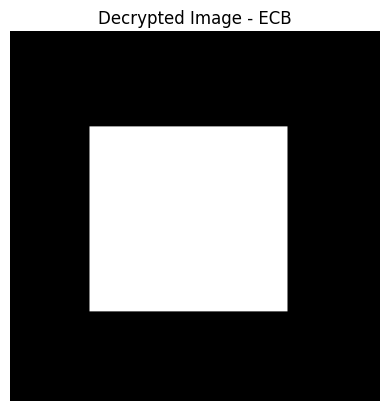

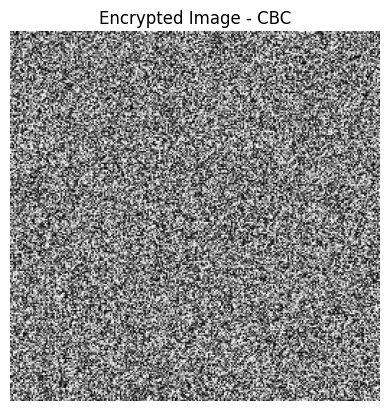

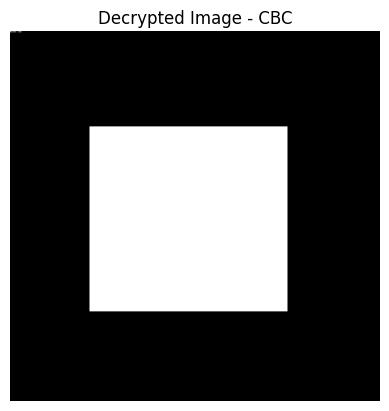

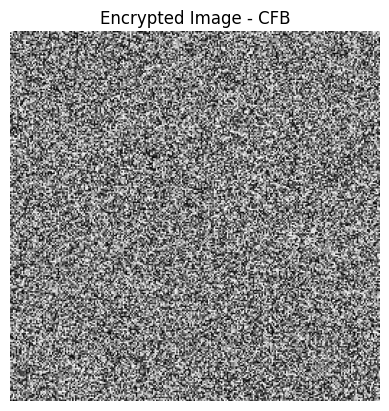

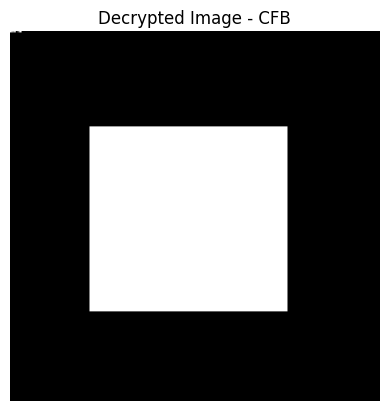

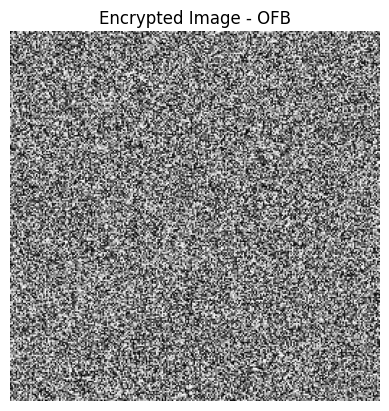

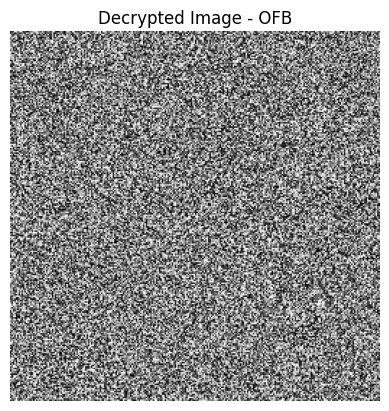

In [61]:
# **9. Implementing Different Modes (CBC, CFB, OFB, CTR)**
IV = os.urandom(8)  # Initialization Vector

modes = {
    "ECB": DES.MODE_ECB,
    "CBC": DES.MODE_CBC,
    "CFB": DES.MODE_CFB,
    "OFB": DES.MODE_OFB,

}

for mode_name, mode_value in modes.items():
    encrypted_img_array = encrypt_image(img_array, key, mode_value)
    decrypted_img_array = decrypt_image(encrypted_img_array, key, mode_value)
    show_image(encrypted_img_array, f"Encrypted Image - {mode_name}")
    show_image(decrypted_img_array, f"Decrypted Image - {mode_name}")

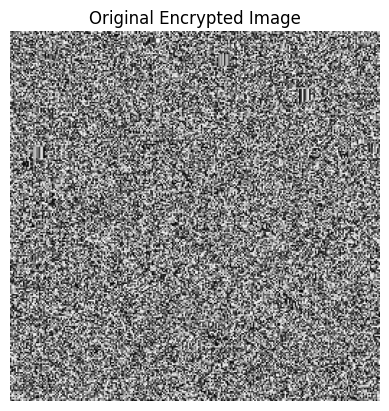

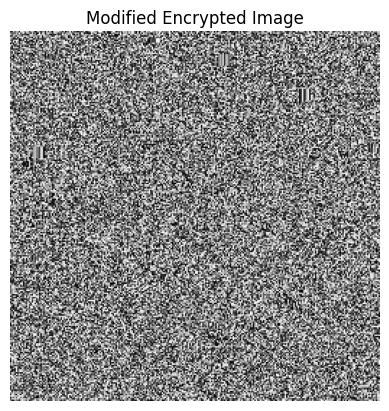

In [55]:
# **10. Avalanche Effect Analysis**
def avalanche_effect_test(image_array, key):
    modified_image_array = image_array.copy()
    modified_image_array[0, 0] ^= 1  # Flip a single bit

    original_encrypted = encrypt_image(image_array, key)
    modified_encrypted = encrypt_image(modified_image_array, key)

    show_image(original_encrypted, "Original Encrypted Image")
    show_image(modified_encrypted, "Modified Encrypted Image")

avalanche_effect_test(img_array, key)

In [56]:
# **11. Brute-Force Attack Simulation**
def brute_force_attack(encrypted_array, known_plaintext):
    for key_candidate in itertools.product(range(256), repeat=8):
        key_candidate = bytes(key_candidate)
        cipher = DES.new(key_candidate, DES.MODE_ECB)
        decrypted_data = cipher.decrypt(encrypted_array.tobytes())
        if decrypted_data.startswith(known_plaintext):
            print(f"Key Found: {key_candidate}")
            return key_candidate

print("Brute-force attack simulation would take too long to complete practically, but the function is ready.")

Brute-force attack simulation would take too long to complete practically, but the function is ready.


In [57]:
# **12. Conclusion & Future Work**
print("DES encryption for images has been demonstrated with different modes. Future work includes implementing AES for stronger security.")


DES encryption for images has been demonstrated with different modes. Future work includes implementing AES for stronger security.
